## Hypothesis 3 Testing
### Road accident frequency/severity increases with rainfall (Melbourne LGA)

In [1]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import scipy.stats as st
from scipy.stats import linregress

In [2]:
# Import cleaned Melbourne crash + weather data
melbourne_data_path = "cleaned_data/merged_melb_data.csv"
melbourne_data = pd.read_csv(melbourne_data_path)
melbourne_data.head()

,ACCIDENT_NO,ABS_CODE,ACCIDENT_STATUS,Date,ACCIDENT_TIME,ALCOHOLTIME,ACCIDENT_TYPE,DAY_OF_WEEK,DCA_CODE,HIT_RUN_FLAG,...,MOTORCYCLE,PUBLICVEHICLE,DEG_URBAN_NAME,DEG_URBAN_ALL,LGA_NAME_ALL,REGION_NAME_ALL,RMA,STAT_DIV_NAME,Rainfall amount (millimetres),Maximum temperature (Degree C)
0,T20140013533,Driving accident,Unfinished,2014/07/01,18:05:00,Yes,Collision with vehicle,Monday,REAR END(VEHICLES IN SAME LANE),No,...,0.0,0.0,MELB_URBAN,MELB_URBAN,MELBOURNE,METROPOLITAN NORTH WEST REGION,Freeway,Metro,0.4,13.3
1,T20140013680,Driving accident,Finished,2014/07/03,11:00:00,No,No collision and no object struck,Thursday,OFF CARRIAGEWAY TO RIGHT,No,...,1.0,0.0,MELBOURNE_CBD,MELBOURNE_CBD,MELBOURNE,METROPOLITAN NORTH WEST REGION,Local Road,Metro,0.0,13.1
2,T20140013898,Driving accident,Finished,2014/07/03,10:30:00,No,Fall from or in moving vehicle,Thursday,FELL IN/FROM VEHICLE,No,...,0.0,1.0,MELB_URBAN,MELB_URBAN,MELBOURNE,METROPOLITAN NORTH WEST REGION,Local Road,Metro,0.0,13.1
3,T20140013771,Driving accident,Finished,2014/07/04,17:40:00,No,No collision and no object struck,Thursday,OUT OF CONTROL ON CARRIAGEWAY (ON STRAIGHT),No,...,1.0,0.0,MELB_URBAN,MELB_URBAN,MELBOURNE,METROPOLITAN NORTH WEST REGION,Local Road,Metro,0.0,12.8
4,T20140013792,Driving accident,Finished,2014/07/04,23:13:00,Yes,Collision with vehicle,Thursday,RIGHT THROUGH,No,...,1.0,0.0,MELBOURNE_CBD,MELBOURNE_CBD,MELBOURNE,METROPOLITAN NORTH WEST REGION,Arterial Other,Metro,0.0,12.8


#### (1a) Road accident (all roads) frequency against rainfall (Melbourne LGA)

In [3]:
# Group data by the accident date to find daily values.
grouped_melbourne_df = melbourne_data.groupby(["Date"])

# Assign data to axis: x_axis is daily accident count, y_axis is rainfall (mean used but all rainfall data 
# values same for the same date).
y_axis = grouped_melbourne_df["ACCIDENT_NO"].count()
x_axis = grouped_melbourne_df["Rainfall amount (millimetres)"].mean().reset_index()

The pvalue of this correlation is 0.09890784710964051 ---> We cannot reject null hypothesis


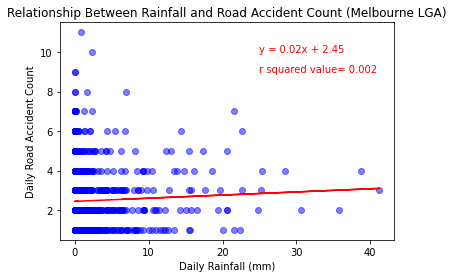

In [4]:
# Undertake the linear regression and plot using matplotlib
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis["Rainfall amount (millimetres)"], y_axis)
regress_values = x_axis["Rainfall amount (millimetres)"] * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r2_value = "r squared value= " + str(round((rvalue**2),3))

# Use matplotlib to create a scatter plot
plt.scatter(x_axis["Rainfall amount (millimetres)"], y_axis, marker="o", facecolors="blue", edgecolors="blue", alpha=0.5)
plt.plot(x_axis["Rainfall amount (millimetres)"],regress_values,"r-")
plt.annotate(line_eq,(25,10),fontsize=10,color="red")
plt.annotate(r2_value,(25,9),fontsize=10,color="red")
plt.title("Relationship Between Rainfall and Road Accident Count (Melbourne LGA)")
plt.xlabel("Daily Rainfall (mm)")
plt.ylabel("Daily Road Accident Count")

# Save the figure
# plt.savefig(os.path.join("figures",f"Melb_Rainfall_vs_Accident_Count.png"))
print('The pvalue of this correlation is '+str(pvalue)+' ---> We cannot reject null hypothesis')

In [5]:
# Calculating the correlation coefficient for daily rainfall and daily road accident count
correlation = st.pearsonr(x_axis["Rainfall amount (millimetres)"], y_axis)
print(f"The correlation between daily rainfall and daily road accident count for all roads in Melbourne LGA is {round(correlation[0],2)}")

# Outcome: correlation=0.04 means there is no correlation i.e daily rainfall has no impact 
# on daily road accident frequency. Therefore confirming the Null Hypothesis.

The correlation between daily rainfall and daily road accident count for all roads in Melbourne LGA is 0.04


#### (1b) Road accident (only freeways/arterials) frequency against rainfall (Melbourne LGA)

In [6]:
# Create new dataframe for melbourne_data that only contains freeways/arterials
#melbourne_data["RMA"].unique()
melbourne_main_roads=melbourne_data.loc[((melbourne_data["RMA"]=="Freeway") | 
                                         (melbourne_data["RMA"]=="Arterial Highway") | 
                                         (melbourne_data["RMA"]=="Arterial Other"))]
melbourne_main_roads.head()

,ACCIDENT_NO,ABS_CODE,ACCIDENT_STATUS,Date,ACCIDENT_TIME,ALCOHOLTIME,ACCIDENT_TYPE,DAY_OF_WEEK,DCA_CODE,HIT_RUN_FLAG,...,MOTORCYCLE,PUBLICVEHICLE,DEG_URBAN_NAME,DEG_URBAN_ALL,LGA_NAME_ALL,REGION_NAME_ALL,RMA,STAT_DIV_NAME,Rainfall amount (millimetres),Maximum temperature (Degree C)
0,T20140013533,Driving accident,Unfinished,2014/07/01,18:05:00,Yes,Collision with vehicle,Monday,REAR END(VEHICLES IN SAME LANE),No,...,0.0,0.0,MELB_URBAN,MELB_URBAN,MELBOURNE,METROPOLITAN NORTH WEST REGION,Freeway,Metro,0.4,13.3
4,T20140013792,Driving accident,Finished,2014/07/04,23:13:00,Yes,Collision with vehicle,Thursday,RIGHT THROUGH,No,...,1.0,0.0,MELBOURNE_CBD,MELBOURNE_CBD,MELBOURNE,METROPOLITAN NORTH WEST REGION,Arterial Other,Metro,0.0,12.8
6,T20140013781,Driving accident,Finished,2014/07/04,18:45:00,Yes,Collision with vehicle,Friday,REAR END(VEHICLES IN SAME LANE),No,...,0.0,0.0,MELB_URBAN,MELB_URBAN,MELBOURNE,METROPOLITAN NORTH WEST REGION,Freeway,Metro,0.0,12.8
9,T20140013895,Driving accident,Finished,2014/07/06,11:38:00,No,Collision with vehicle,Sunday,REAR END(VEHICLES IN SAME LANE),No,...,0.0,0.0,MELB_URBAN,MELB_URBAN,MELBOURNE,METROPOLITAN NORTH WEST REGION,Freeway,Metro,0.2,13.8
12,T20140014421,Driving accident,Finished,2014/07/12,12:59:00,No,Collision with vehicle,Saturday,REAR END(VEHICLES IN SAME LANE),No,...,0.0,0.0,MELB_URBAN,MELB_URBAN,MELBOURNE,METROPOLITAN NORTH WEST REGION,Freeway,Metro,4.4,10.4


In [7]:
# Double check only the main roads (arterials or freeways) returned
melbourne_main_roads["RMA"].unique()

array(['Freeway', 'Arterial Other', 'Arterial Highway'], dtype=object)

In [8]:
# Group data by the accident date to find daily values.
grouped_melbourne_main_roads_df = melbourne_main_roads.groupby(["Date"])

# Assign data to axis: x_axis is daily accident count, y_axis is rainfall (mean used but all rainfall data 
# values same for the same date).
y_axis = grouped_melbourne_main_roads_df["ACCIDENT_NO"].count()
x_axis = grouped_melbourne_main_roads_df["Rainfall amount (millimetres)"].mean().reset_index()

The pvalue of this correlation is 0.1951282449061802 ---> We cannot reject null hypothesis


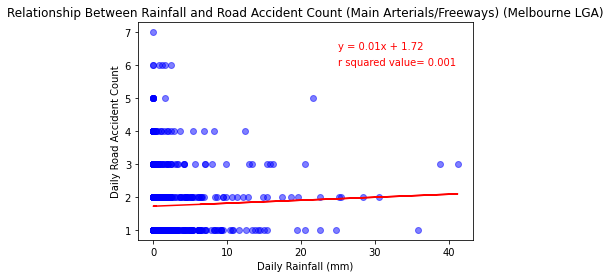

In [9]:
# Undertake the linear regression and plot using matplotlib
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis["Rainfall amount (millimetres)"], y_axis)
regress_values = x_axis["Rainfall amount (millimetres)"] * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r2_value = "r squared value= " + str(round((rvalue**2),3))

# Use matplotlib to create a scatter plot
plt.scatter(x_axis["Rainfall amount (millimetres)"], y_axis, marker="o", facecolors="blue", edgecolors="blue", alpha=0.5)
plt.plot(x_axis["Rainfall amount (millimetres)"],regress_values,"r-")
plt.annotate(line_eq,(25,6.5),fontsize=10,color="red")
plt.annotate(r2_value,(25,6),fontsize=10,color="red")
plt.title("Relationship Between Rainfall and Road Accident Count (Main Arterials/Freeways) (Melbourne LGA)")
plt.xlabel("Daily Rainfall (mm)")
plt.ylabel("Daily Road Accident Count")

# Save the figure
plt.savefig(os.path.join("figures",f"Melb_Rainfall_vs_Accident_Count_Arterials_Freeways.png"))
print('The pvalue of this correlation is '+str(pvalue)+' ---> We cannot reject null hypothesis')

In [10]:
# Calculating the correlation coefficient for daily rainfall and daily road accident count
correlation = st.pearsonr(x_axis["Rainfall amount (millimetres)"], y_axis)
print(f"The correlation between daily rainfall and daily road accident count for arterials/freeways in Melbourne LGA is {round(correlation[0],2)}")

# Outcome: correlation=0.04 means there is no correlation i.e daily rainfall has no impact 
# on daily road accident frequency. Therefore confirming the Null Hypothesis.

The correlation between daily rainfall and daily road accident count for arterials/freeways in Melbourne LGA is 0.04


#### (2a) Road accident severity (all roads, as fatality count) against rainfall (Melbourne LGA)

In [116]:
# Group data by the accident date to find daily values.
grouped_melbourne_df = melbourne_data.groupby(["Date"])

# Assign data to axis: x_axis is fatality sum, y_axis is rainfall (mean used but all rainfall data 
# values same for the same date).
y_axis = grouped_melbourne_df["FATALITY"].sum()
x_axis = grouped_melbourne_df["Rainfall amount (millimetres)"].mean().reset_index()

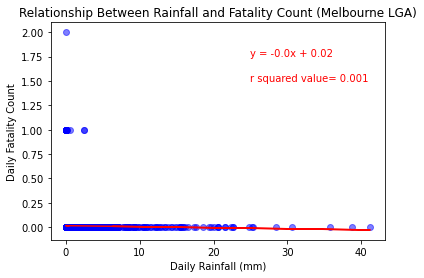

In [117]:
# Undertake the linear regression and plot using matplotlib
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis["Rainfall amount (millimetres)"], y_axis)
regress_values = x_axis["Rainfall amount (millimetres)"] * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r2_value = "r squared value= " + str(round((rvalue**2),3))

# Use matplotlib to create a scatter plot
plt.scatter(x_axis["Rainfall amount (millimetres)"], y_axis, marker="o", facecolors="blue", edgecolors="blue", alpha=0.5)
plt.plot(x_axis["Rainfall amount (millimetres)"],regress_values,"r-")
plt.annotate(line_eq,(25,1.75),fontsize=10,color="red")
plt.annotate(r2_value,(25,1.50),fontsize=10,color="red")
plt.title("Relationship Between Rainfall and Fatality Count (Melbourne LGA)")
plt.xlabel("Daily Rainfall (mm)")
plt.ylabel("Daily Fatality Count")

# Save the figure
plt.savefig(os.path.join("figures",f"Melb_Rainfall_vs_Fatality_Count.png"))

In [118]:
# Calculating the correlation coefficient for daily rainfall and daily fatality count
correlation = st.pearsonr(x_axis["Rainfall amount (millimetres)"], y_axis)
print(f"The correlation between daily rainfall and daily fatality count for all roads in Melbourne LGA is {round(correlation[0],2)}")

# Outcome: correlation=-0.03 means there is no correlation i.e daily rainfall does not appear to 
# increase the likelihood of fatalities in road accidents (all roads) in Melbourne LGA. 
# Therefore confirming the Null Hypothesis.

The correlation between daily rainfall and daily fatality count for all roads in Melbourne LGA is -0.03


#### (2b) Road accident severity (only freeways/arterials,as fatality count) against rainfall (Melbourne LGA)

In [119]:
# Group data by the accident date to find daily values.
grouped_melbourne_main_roads_df = melbourne_main_roads.groupby(["Date"])

# Assign data to axis: x_axis is fatality sum, y_axis is rainfall (mean used but all rainfall data 
# values same for the same date).
y_axis = grouped_melbourne_main_roads_df["FATALITY"].sum()
x_axis = grouped_melbourne_main_roads_df["Rainfall amount (millimetres)"].mean().reset_index()

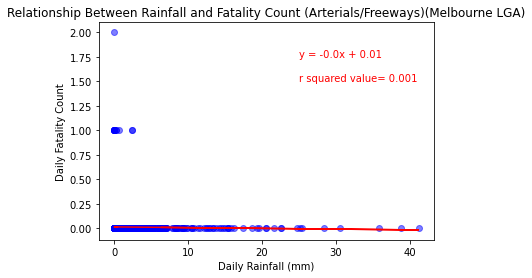

In [120]:
# Undertake the linear regression and plot using matplotlib
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis["Rainfall amount (millimetres)"], y_axis)
regress_values = x_axis["Rainfall amount (millimetres)"] * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r2_value = "r squared value= " + str(round((rvalue**2),3))

# Use matplotlib to create a scatter plot
plt.scatter(x_axis["Rainfall amount (millimetres)"], y_axis, marker="o", facecolors="blue", edgecolors="blue", alpha=0.5)
plt.plot(x_axis["Rainfall amount (millimetres)"],regress_values,"r-")
plt.annotate(line_eq,(25,1.75),fontsize=10,color="red")
plt.annotate(r2_value,(25,1.50),fontsize=10,color="red")
plt.title("Relationship Between Rainfall and Fatality Count (Arterials/Freeways)(Melbourne LGA)")
plt.xlabel("Daily Rainfall (mm)")
plt.ylabel("Daily Fatality Count")

# Save the figure
plt.savefig(os.path.join("figures",f"Melb_Rainfall_vs_Fatality_Count_Arterials_Freeways.png"))

In [122]:
# Calculating the correlation coefficient for daily rainfall and daily fatality count
correlation = st.pearsonr(x_axis["Rainfall amount (millimetres)"], y_axis)
print(f"The correlation between daily rainfall and daily fatality count for arterials/freeways in Melbourne LGA is {round(correlation[0],2)}")

# Outcome: correlation=-0.02 means there is no correlation i.e daily rainfall does not appear to 
# increase the likelihood of fatalities in road accidents in Melbourne. 
# Therefore confirming the Null Hypothesis.

The correlation between daily rainfall and daily fatality count for arterials/freeways in Melbourne LGA is -0.02


### Road accident frequency/severity increases with rainfall (Hume LGA)

In [123]:
# Import cleaned Hume crash + weather data
hume_data_path = "cleaned_data/merged_hume_data.csv"
hume_data = pd.read_csv(hume_data_path)
hume_data.head()

,ACCIDENT_NO,ABS_CODE,ACCIDENT_STATUS,Date,ACCIDENT_TIME,ALCOHOLTIME,ACCIDENT_TYPE,DAY_OF_WEEK,DCA_CODE,HIT_RUN_FLAG,...,MOTORCYCLE,PUBLICVEHICLE,DEG_URBAN_NAME,DEG_URBAN_ALL,LGA_NAME_ALL,REGION_NAME_ALL,RMA,STAT_DIV_NAME,Rainfall amount (millimetres),Maximum temperature (Degree C)
0,T20140013978,Driving accident,Finished,2014/07/07,17:45:00,No,Struck Pedestrian,Monday,PED ON FOOTHPATH STRUCK BY VEHENTERING/LEAVING...,No,...,0.0,0.0,MELB_URBAN,MELB_URBAN,HUME,METROPOLITAN NORTH WEST REGION,Local Road,Metro,0.2,15.3
1,T20140013706,Driving accident,Finished,2014/07/03,15:50:00,No,Collision with vehicle,Thursday,REAR END(VEHICLES IN SAME LANE),No,...,1.0,0.0,MELB_URBAN,MELB_URBAN,HUME,METROPOLITAN NORTH WEST REGION,Local Road,Metro,0.0,11.7
2,T20140014503,Driving accident,Finished,2014/07/14,13:27:00,No,Collision with vehicle,Monday,LANE CHANGE LEFT (NOT OVERTAKING),No,...,0.0,0.0,MELB_URBAN,MELB_URBAN,HUME,METROPOLITAN NORTH WEST REGION,Freeway,Metro,0.4,12.4
3,T20140014709,Driving accident,Finished,2014/07/16,13:30:00,No,No collision and no object struck,Wednesday,OUT OF CONTROL ON CARRIAGEWAY (ON STRAIGHT),No,...,1.0,0.0,RURAL_VICTORIA,RURAL_VICTORIA,HUME,METROPOLITAN NORTH WEST REGION,Local Road,Metro,0.4,13.8
4,T20140014809,Driving accident,Finished,2014/07/17,20:40:00,Yes,No collision and no object struck,Thursday,OFF CARRIAGEWAY TO LEFT,No,...,0.0,0.0,MELB_URBAN,MELB_URBAN,HUME,METROPOLITAN NORTH WEST REGION,Arterial Other,Metro,0.0,11.7


#### (1a) Road accident (all roads) frequency against rainfall (Hume LGA)

In [124]:
# Group data by the accident date to find daily values.
grouped_hume_df = hume_data.groupby(["Date"])

# Assign data to axis: x_axis is daily accident count, y_axis is rainfall (mean used but all rainfall data 
# values same for the same date).
y_axis = grouped_hume_df["ACCIDENT_NO"].count()
x_axis = grouped_hume_df["Rainfall amount (millimetres)"].mean().reset_index()

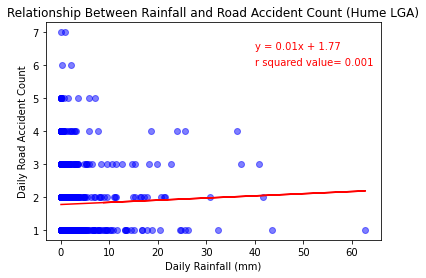

In [125]:
# Undertake the linear regression and plot using matplotlib
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis["Rainfall amount (millimetres)"], y_axis)
regress_values = x_axis["Rainfall amount (millimetres)"] * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r2_value = "r squared value= " + str(round((rvalue**2),3))

# Use matplotlib to create a scatter plot
plt.scatter(x_axis["Rainfall amount (millimetres)"], y_axis, marker="o", facecolors="blue", edgecolors="blue", alpha=0.5)
plt.plot(x_axis["Rainfall amount (millimetres)"],regress_values,"r-")
plt.annotate(line_eq,(40,6.5),fontsize=10,color="red")
plt.annotate(r2_value,(40,6),fontsize=10,color="red")
plt.title("Relationship Between Rainfall and Road Accident Count (Hume LGA)")
plt.xlabel("Daily Rainfall (mm)")
plt.ylabel("Daily Road Accident Count")

# Save the figure
plt.savefig(os.path.join("figures",f"Hume_Rainfall_vs_Accident_Count.png"))

In [126]:
# Calculating the correlation coefficient for daily rainfall and daily road accident count
correlation = st.pearsonr(x_axis["Rainfall amount (millimetres)"], y_axis)
print(f"The correlation between daily rainfall and daily road accident count for all roads in Hume LGA is {round(correlation[0],2)}")

# Outcome: correlation=0.03 means there is no correlation i.e daily rainfall has no impact 
# on daily road accident frequency. Therefore confirming the Null Hypothesis.

The correlation between daily rainfall and daily road accident count for all roads in Hume LGA is 0.03


#### (1b) Road accident (only freeways/arterials) frequency against rainfall (Hume LGA)

In [127]:
# Create new dataframe for hume_data that only contains freeways/arterials
#hume_data["RMA"].unique()
hume_main_roads=hume_data.loc[((hume_data["RMA"]=="Freeway") | 
                                         (hume_data["RMA"]=="Arterial Highway") | 
                                         (hume_data["RMA"]=="Arterial Other"))]
hume_main_roads.head()

,ACCIDENT_NO,ABS_CODE,ACCIDENT_STATUS,Date,ACCIDENT_TIME,ALCOHOLTIME,ACCIDENT_TYPE,DAY_OF_WEEK,DCA_CODE,HIT_RUN_FLAG,...,MOTORCYCLE,PUBLICVEHICLE,DEG_URBAN_NAME,DEG_URBAN_ALL,LGA_NAME_ALL,REGION_NAME_ALL,RMA,STAT_DIV_NAME,Rainfall amount (millimetres),Maximum temperature (Degree C)
2,T20140014503,Driving accident,Finished,2014/07/14,13:27:00,No,Collision with vehicle,Monday,LANE CHANGE LEFT (NOT OVERTAKING),No,...,0.0,0.0,MELB_URBAN,MELB_URBAN,HUME,METROPOLITAN NORTH WEST REGION,Freeway,Metro,0.4,12.4
4,T20140014809,Driving accident,Finished,2014/07/17,20:40:00,Yes,No collision and no object struck,Thursday,OFF CARRIAGEWAY TO LEFT,No,...,0.0,0.0,MELB_URBAN,MELB_URBAN,HUME,METROPOLITAN NORTH WEST REGION,Arterial Other,Metro,0.0,11.7
8,T20140015079,Driving accident,Finished,2014/07/22,09:15:00,No,Collision with vehicle,Tuesday,VEHICLE OFF FOOTPATH STRIKES VEH ON CARRIAGEWAY,No,...,0.0,0.0,SMALL_CITIES,SMALL_CITIES,HUME,METROPOLITAN NORTH WEST REGION,Arterial Other,Metro,0.0,10.1
10,T20140015349,Driving accident,Finished,2014/07/25,17:00:00,Yes,Collision with vehicle,Friday,RIGHT THROUGH,No,...,0.0,0.0,RURAL_VICTORIA,RURAL_VICTORIA,HUME,METROPOLITAN NORTH WEST REGION,Arterial Other,Metro,0.0,15.9
11,T20140015197,Driving accident,Finished,2014/07/23,17:14:00,No,Collision with vehicle,Wednesday,HEAD ON (NOT OVERTAKING),No,...,0.0,0.0,MELB_URBAN,MELB_URBAN,HUME,METROPOLITAN NORTH WEST REGION,Freeway,Metro,0.0,12.4


In [128]:
# Double check only the main roads (arterials or freeways) returned
hume_main_roads["RMA"].unique()

array(['Freeway', 'Arterial Other', 'Arterial Highway'], dtype=object)

In [129]:
# Group data by the accident date to find daily values.
grouped_hume_main_roads_df = hume_main_roads.groupby(["Date"])

# Assign data to axis: x_axis is daily accident count, y_axis is rainfall (mean used but all rainfall data 
# values same for the same date).
y_axis = grouped_hume_main_roads_df["ACCIDENT_NO"].count()
x_axis = grouped_hume_main_roads_df["Rainfall amount (millimetres)"].mean().reset_index()

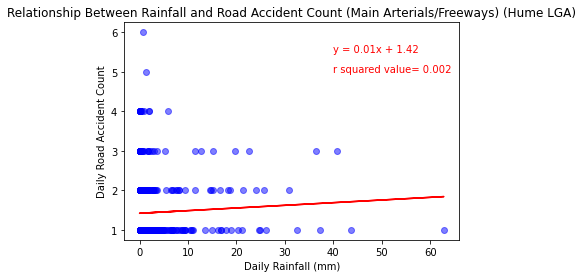

In [130]:
# Undertake the linear regression and plot using matplotlib
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis["Rainfall amount (millimetres)"], y_axis)
regress_values = x_axis["Rainfall amount (millimetres)"] * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r2_value = "r squared value= " + str(round((rvalue**2),3))

# Use matplotlib to create a scatter plot
plt.scatter(x_axis["Rainfall amount (millimetres)"], y_axis, marker="o", facecolors="blue", edgecolors="blue", alpha=0.5)
plt.plot(x_axis["Rainfall amount (millimetres)"],regress_values,"r-")
plt.annotate(line_eq,(40,5.5),fontsize=10,color="red")
plt.annotate(r2_value,(40,5),fontsize=10,color="red")
plt.title("Relationship Between Rainfall and Road Accident Count (Main Arterials/Freeways) (Hume LGA)")
plt.xlabel("Daily Rainfall (mm)")
plt.ylabel("Daily Road Accident Count")

# Save the figure
plt.savefig(os.path.join("figures",f"Hume_Rainfall_vs_Accident_Count_Arterials_Freeways.png"))

In [131]:
# Calculating the correlation coefficient for daily rainfall and daily road accident count
correlation = st.pearsonr(x_axis["Rainfall amount (millimetres)"], y_axis)
print(f"The correlation between daily rainfall and daily road accident count for arterials/freeways in Hume LGA is {round(correlation[0],2)}")

# Outcome: correlation=0.05 means there is no correlation i.e daily rainfall has no impact 
# on daily road accident frequency. Therefore confirming the Null Hypothesis.

The correlation between daily rainfall and daily road accident count for arterials/freeways in Hume LGA is 0.05


#### (2a) Road accident severity (all roads, as fatality count) against rainfall (Hume LGA)

In [132]:
# Group data by the accident date to find daily values.
grouped_hume_df = hume_data.groupby(["Date"])

# Assign data to axis: x_axis is fatality sum, y_axis is rainfall (mean used but all rainfall data 
# values same for the same date).
y_axis = grouped_hume_df["FATALITY"].sum()
x_axis = grouped_hume_df["Rainfall amount (millimetres)"].mean().reset_index()

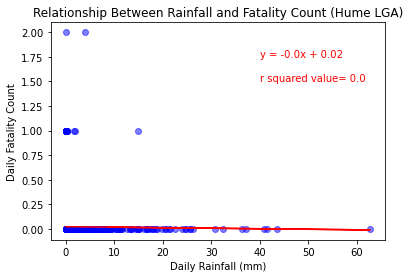

In [133]:
# Undertake the linear regression and plot using matplotlib
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis["Rainfall amount (millimetres)"], y_axis)
regress_values = x_axis["Rainfall amount (millimetres)"] * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r2_value = "r squared value= " + str(round((rvalue**2),3))

# Use matplotlib to create a scatter plot
plt.scatter(x_axis["Rainfall amount (millimetres)"], y_axis, marker="o", facecolors="blue", edgecolors="blue", alpha=0.5)
plt.plot(x_axis["Rainfall amount (millimetres)"],regress_values,"r-")
plt.annotate(line_eq,(40,1.75),fontsize=10,color="red")
plt.annotate(r2_value,(40,1.50),fontsize=10,color="red")
plt.title("Relationship Between Rainfall and Fatality Count (Hume LGA)")
plt.xlabel("Daily Rainfall (mm)")
plt.ylabel("Daily Fatality Count")

# Save the figure
plt.savefig(os.path.join("figures",f"Hume_Rainfall_vs_Fatality_Count.png"))

In [134]:
# Calculating the correlation coefficient for daily rainfall and daily fatality count
correlation = st.pearsonr(x_axis["Rainfall amount (millimetres)"], y_axis)
print(f"The correlation between daily rainfall and daily fatality count for all roads in Hume LGA is {round(correlation[0],2)}")

# Outcome: correlation=-0.02 means there is no correlation i.e daily rainfall does not appear to 
# increase the likelihood of fatalities in road accidents (all roads) in Hume LGA. 
# Therefore confirming the Null Hypothesis.

The correlation between daily rainfall and daily fatality count for all roads in Hume LGA is -0.02


#### (2b) Road accident severity (only freeways/arterials, as fatality count) against rainfall (Hume LGA)

In [135]:
# Group data by the accident date to find daily values.
grouped_hume_main_roads_df = hume_main_roads.groupby(["Date"])

# Assign data to axis: x_axis is fatality sum, y_axis is rainfall (mean used but all rainfall data 
# values same for the same date).
y_axis = grouped_hume_main_roads_df["FATALITY"].sum()
x_axis = grouped_hume_main_roads_df["Rainfall amount (millimetres)"].mean().reset_index()

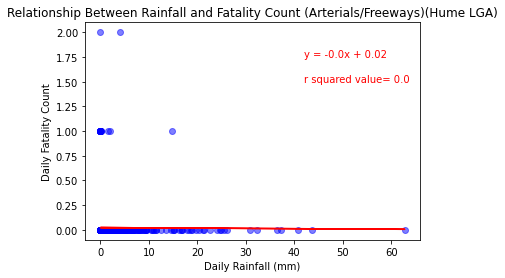

In [136]:
# Undertake the linear regression and plot using matplotlib
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis["Rainfall amount (millimetres)"], y_axis)
regress_values = x_axis["Rainfall amount (millimetres)"] * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r2_value = "r squared value= " + str(round((rvalue**2),3))

# Use matplotlib to create a scatter plot
plt.scatter(x_axis["Rainfall amount (millimetres)"], y_axis, marker="o", facecolors="blue", edgecolors="blue", alpha=0.5)
plt.plot(x_axis["Rainfall amount (millimetres)"],regress_values,"r-")
plt.annotate(line_eq,(42,1.75),fontsize=10,color="red")
plt.annotate(r2_value,(42,1.50),fontsize=10,color="red")
plt.title("Relationship Between Rainfall and Fatality Count (Arterials/Freeways)(Hume LGA)")
plt.xlabel("Daily Rainfall (mm)")
plt.ylabel("Daily Fatality Count")

# Save the figure
plt.savefig(os.path.join("figures",f"Hume_Rainfall_vs_Fatality_Count_Arterials_Freeways.png"))

In [137]:
# Calculating the correlation coefficient for daily rainfall and daily fatality count
correlation = st.pearsonr(x_axis["Rainfall amount (millimetres)"], y_axis)
print(f"The correlation between daily rainfall and daily fatality count for arterials/freeways in Hume LGA is {round(correlation[0],2)}")

# Outcome: correlation=-0.01 means there is no correlation i.e daily rainfall does not appear to 
# increase the likelihood of fatalities in road accidents on arterials/freeways in Hume. 
# Therefore confirming the Null Hypothesis.

The correlation between daily rainfall and daily fatality count for arterials/freeways in Hume LGA is -0.01
